## Imports

In [1]:
import utils, models_preprocessing, metrics
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os
import PIL.Image
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras import models
from keras.models import save_model, load_model
from keras.preprocessing import image
from quiver_engine import server

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Prepare data

In [2]:
data = np.load('data/imadjust.npy')
labels = np.load('labels/classification.npy')

## Model function

In [3]:
# model_function = models_preprocessing.compiledConvnet
model_function = models_preprocessing.compiledRegularizedConvnet
auroc = metrics.auroc
accuracy = metrics.accuracy
text = metrics.basicTextMetrics

In [4]:
%matplotlib inline

## Data split

In [5]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, labels, test_size=0.25)

## Train

In [6]:
## Run 1: Compiled Regularized ConvNet
model = utils.train(model_function(), 30, Xtrain, Ytrain)

Epoch 1/30
15000/15000 [==============================] - 106s 7ms/step - loss: 52.1378 - acc: 0.6971
Epoch 2/30
15000/15000 [==============================] - 106s 7ms/step - loss: 7.0914 - acc: 0.7596
Epoch 3/30
15000/15000 [==============================] - 106s 7ms/step - loss: 1.8586 - acc: 0.7864
Epoch 4/30
15000/15000 [==============================] - 106s 7ms/step - loss: 0.9219 - acc: 0.8104
Epoch 5/30
15000/15000 [==============================] - 106s 7ms/step - loss: 0.6443 - acc: 0.8204
Epoch 6/30
15000/15000 [==============================] - 106s 7ms/step - loss: 0.5350 - acc: 0.8306
Epoch 7/30
15000/15000 [==============================] - 106s 7ms/step - loss: 0.4738 - acc: 0.8402
Epoch 8/30
15000/15000 [==============================] - 106s 7ms/step - loss: 0.4405 - acc: 0.8447
Epoch 9/30
15000/15000 [==============================] - 106s 7ms/step - loss: 0.4170 - acc: 0.8551
Epoch 10/30
15000/15000 [==============================] - 106s 7ms/step - loss: 0.4029 - 

## Save model, Print model summary

In [6]:
os.makedirs('models', exist_ok=True)
PATH = 'models/'

In [8]:
save_model(model, f'{PATH}model_reg_05.hdf5')

In [7]:
model = load_model(f'{PATH}model_reg_05.hdf5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 64)        2368      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               247936    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
__________

## Predictions/Probabilities for the whole dataset

In [8]:
preds = model.predict_classes(data)
probs = model.predict(data)

## Incorrect predictions

In [9]:
incorrect_preds = [(i, preds[i][0]) for i in range(len(preds)) if preds[i] != labels[i]]

In [10]:
incorrect_preds

[(15, 0),
 (30, 1),
 (36, 0),
 (37, 0),
 (53, 0),
 (54, 0),
 (62, 0),
 (68, 0),
 (90, 0),
 (110, 0),
 (116, 0),
 (120, 0),
 (122, 1),
 (124, 0),
 (135, 0),
 (147, 0),
 (149, 0),
 (166, 0),
 (170, 0),
 (176, 0),
 (185, 1),
 (196, 0),
 (203, 0),
 (208, 0),
 (217, 0),
 (226, 0),
 (243, 0),
 (245, 0),
 (248, 1),
 (251, 0),
 (262, 0),
 (266, 0),
 (273, 0),
 (279, 0),
 (292, 0),
 (304, 0),
 (309, 0),
 (314, 0),
 (322, 0),
 (338, 1),
 (341, 0),
 (343, 0),
 (366, 0),
 (384, 0),
 (388, 0),
 (391, 0),
 (401, 0),
 (402, 0),
 (407, 0),
 (414, 0),
 (421, 0),
 (434, 0),
 (435, 0),
 (443, 0),
 (456, 0),
 (495, 0),
 (513, 0),
 (527, 0),
 (533, 0),
 (548, 0),
 (550, 0),
 (589, 0),
 (602, 0),
 (607, 0),
 (618, 0),
 (623, 0),
 (628, 1),
 (631, 0),
 (655, 1),
 (666, 0),
 (672, 0),
 (675, 0),
 (678, 0),
 (681, 0),
 (698, 0),
 (707, 0),
 (731, 0),
 (735, 1),
 (738, 0),
 (754, 0),
 (765, 1),
 (791, 0),
 (794, 1),
 (796, 0),
 (808, 0),
 (813, 0),
 (823, 0),
 (851, 0),
 (860, 0),
 (872, 0),
 (905, 0),
 (908, 0

In [11]:
#model.evaluate(Xtest, Ytest)

## Refactored functions

In [12]:
def get_im_tensor(im_data):
    
    img = PIL.Image.fromarray(im_data)
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    
    return img_tensor    

In [13]:
def actn_model(img_tensor, model):
    
    layer_outputs = [layer.output for layer in model.layers[:4]]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)
    
    return activations

In [14]:
def plot_activations(actn, f_num):
    
    plt.matshow(actn[0, :, :, f_num], cmap='viridis')

In [15]:
def plot_all(activations, model):
    
    layer_names = []

    for layer in model.layers[:4]:
        layer_names.append(layer.name)

    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations):
    
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size*n_cols, images_per_row*size))
    
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col*images_per_row + row]
            
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            
                display_grid[col*size : (col+1)*size, row*size : (row+1)*size] = channel_image
    
        scale = 1./size
        plt.figure(figsize=(scale*display_grid.shape[1],
                            scale*display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        #plt.imsave(f'{layer_name}.jpg', display_grid)

In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### True positive

In [17]:
preds[0]

array([1], dtype=int32)

In [18]:
labels[0]

1.0

In [19]:
img_tensor = get_im_tensor(data[0])

In [20]:
img_tensor.shape

(1, 101, 101, 4)

In [21]:
first_layer_activation = actn_model(img_tensor, model)[0]

In [22]:
first_layer_activation.shape

(1, 50, 50, 64)

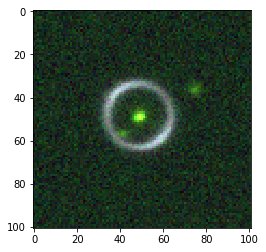

In [23]:
img = PIL.Image.fromarray(data[0][:,:,:3])
plt.imshow(img)

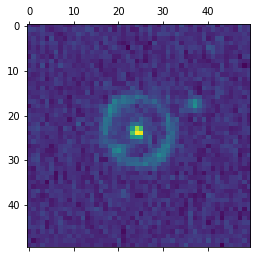

In [24]:
plot_activations(first_layer_activation, 15)

In [25]:
activations = actn_model(img_tensor, model)

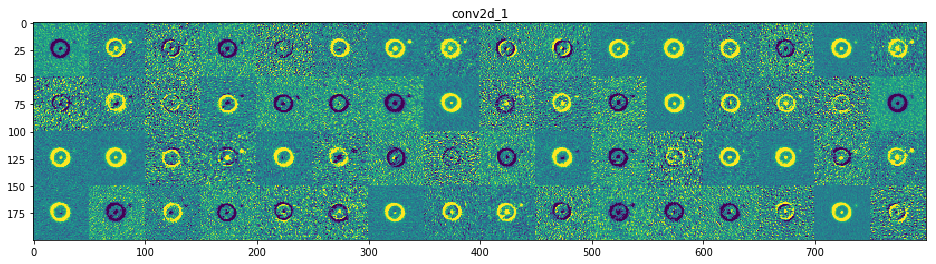

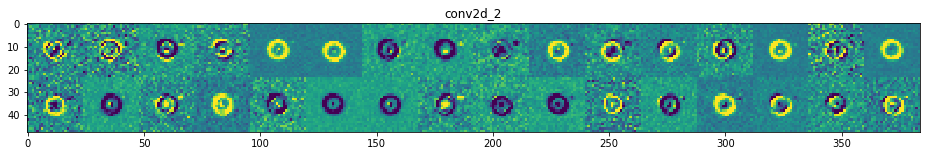

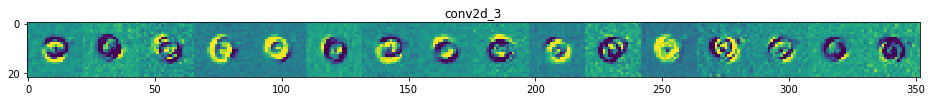

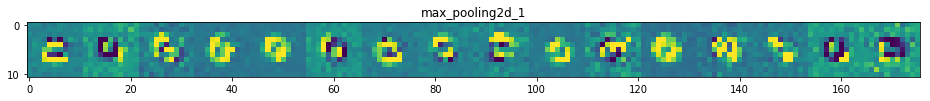

In [26]:
plot_all(activations, model)

### True negative

In [27]:
preds[1]

array([0], dtype=int32)

In [28]:
labels[1]

0.0

In [27]:
img_tensor = get_im_tensor(data[1])

In [28]:
first_layer_activation = actn_model(img_tensor, model)[0]

In [29]:
first_layer_activation.shape

(1, 50, 50, 64)

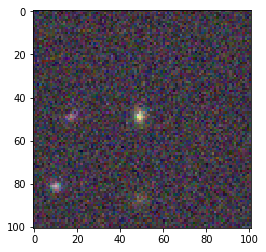

In [30]:
img = PIL.Image.fromarray(data[1][:,:,:3])
plt.imshow(img)

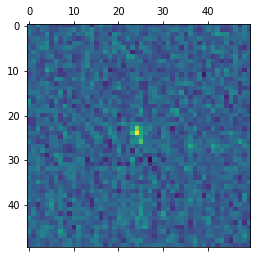

In [31]:
plot_activations(first_layer_activation, 15)

In [32]:
activations = actn_model(img_tensor, model)

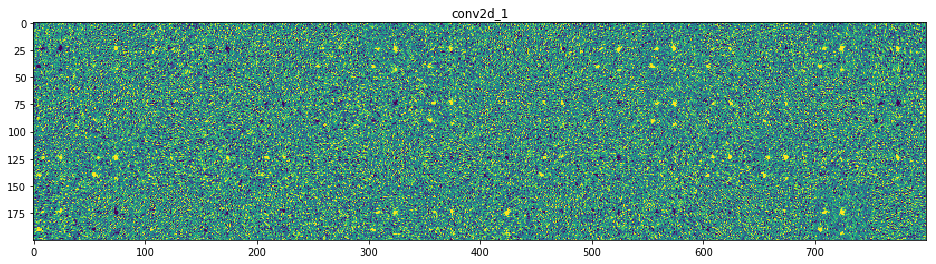

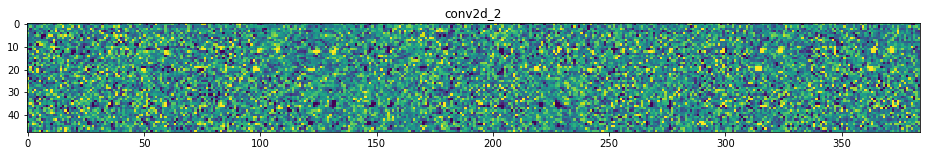

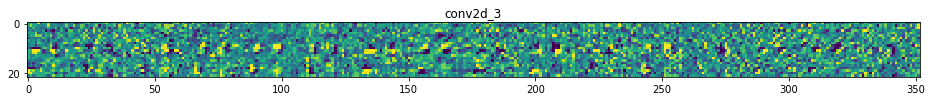

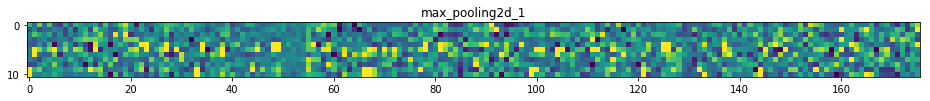

In [33]:
plot_all(activations, model)

### False positive

In [42]:
probs[122]

array([ 0.91752249], dtype=float32)

In [34]:
img_tensor = get_im_tensor(data[122])

In [35]:
first_layer_activation = actn_model(img_tensor, model)[0]

In [36]:
first_layer_activation.shape

(1, 50, 50, 64)

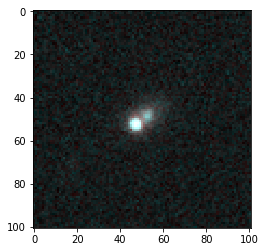

In [37]:
img = PIL.Image.fromarray(data[122][:,:,:3])
plt.imshow(img)

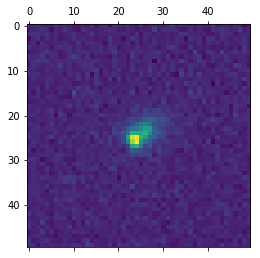

In [38]:
plot_activations(first_layer_activation, 15)

In [39]:
activations = actn_model(img_tensor, model)

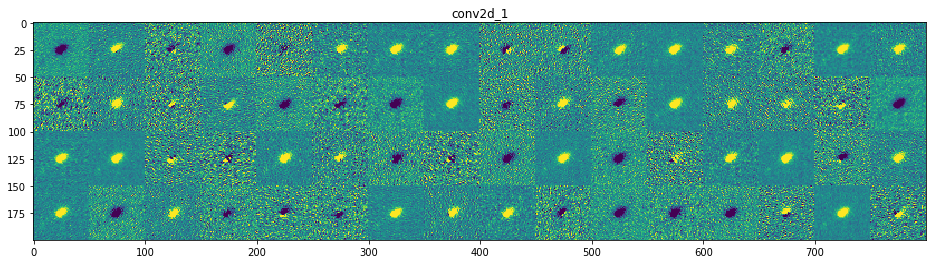

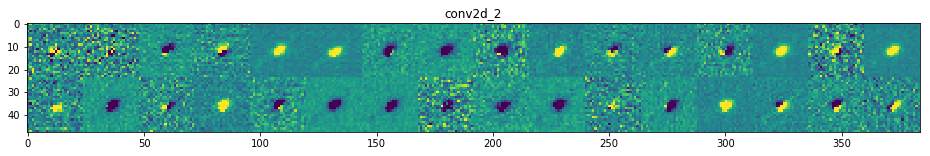

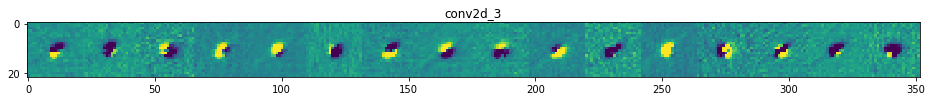

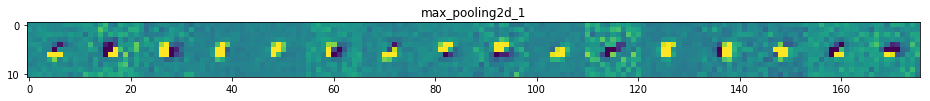

In [40]:
plot_all(activations, model)

### False negative

In [43]:
probs[15]

array([ 0.05425304], dtype=float32)

In [41]:
img_tensor = get_im_tensor(data[15])

In [42]:
first_layer_activation = actn_model(img_tensor, model)[0]

In [43]:
first_layer_activation.shape

(1, 50, 50, 64)

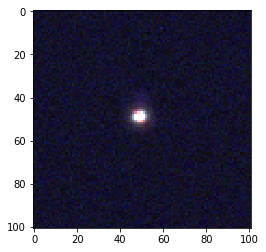

In [44]:
img = PIL.Image.fromarray(data[15][:,:,:3])
plt.imshow(img)

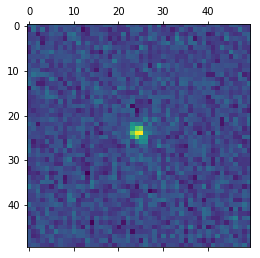

In [45]:
plot_activations(first_layer_activation, 15)

In [46]:
activations = actn_model(img_tensor, model)

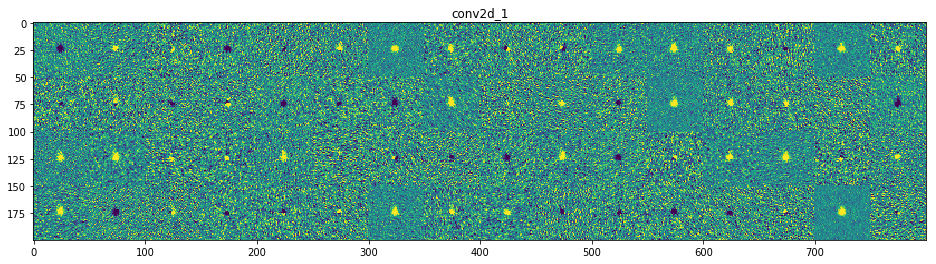

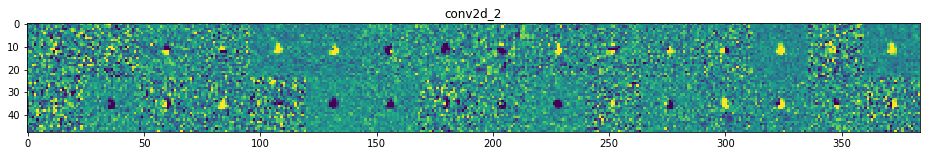

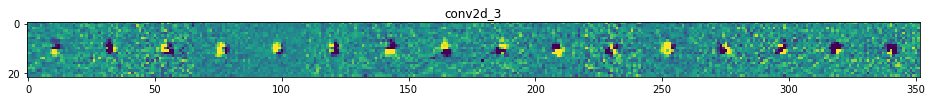

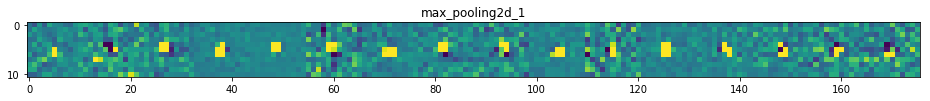

In [47]:
plot_all(activations, model)

## Plot confusion matrix

In [48]:
cm = confusion_matrix(labels, preds)

[[11672   307]
 [ 1441  6580]]


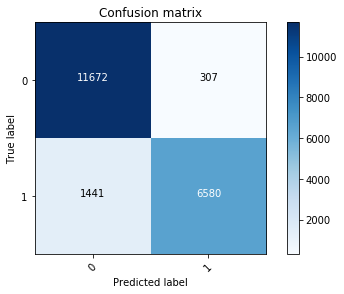

In [49]:
plot_confusion_matrix(cm, [0,1])

In [44]:
len(preds[preds==1])

6887

In [45]:
len(labels[labels==1])

8021

In [46]:
len(labels[labels==0])

11979

## Uncertain predictions

In [61]:
uncertain_preds = [(i, preds[i][0]) for i in range(len(preds)) if probs[i] > 0.48 and probs[i] < 0.52]

In [62]:
uncertain_preds

[(21, 1),
 (37, 0),
 (53, 0),
 (110, 0),
 (116, 0),
 (391, 0),
 (443, 0),
 (487, 0),
 (489, 0),
 (513, 0),
 (637, 1),
 (765, 1),
 (954, 1),
 (1092, 0),
 (1096, 1),
 (1211, 1),
 (1232, 1),
 (1641, 0),
 (1751, 1),
 (1801, 1),
 (1834, 0),
 (1984, 1),
 (2024, 0),
 (2167, 0),
 (2197, 0),
 (2405, 1),
 (2450, 1),
 (2531, 1),
 (2996, 0),
 (3035, 0),
 (3041, 1),
 (3240, 0),
 (3267, 0),
 (3303, 0),
 (3503, 1),
 (3592, 1),
 (3902, 0),
 (4096, 0),
 (4243, 1),
 (4429, 1),
 (4442, 1),
 (4532, 1),
 (4537, 0),
 (4742, 1),
 (4855, 1),
 (4963, 0),
 (5040, 1),
 (5049, 1),
 (5133, 0),
 (5245, 0),
 (5266, 1),
 (5365, 0),
 (5749, 0),
 (5872, 0),
 (5944, 0),
 (6072, 0),
 (6297, 1),
 (6484, 0),
 (6825, 1),
 (7025, 1),
 (7185, 1),
 (7669, 1),
 (7882, 0),
 (7998, 0),
 (8027, 0),
 (8157, 0),
 (8164, 0),
 (8452, 1),
 (8563, 0),
 (8848, 0),
 (8881, 1),
 (8891, 1),
 (8900, 1),
 (9000, 0),
 (9057, 1),
 (9141, 1),
 (9303, 0),
 (9323, 0),
 (9334, 0),
 (9357, 0),
 (9430, 1),
 (9440, 1),
 (9794, 0),
 (9810, 0),
 (9820, 

In [63]:
preds[21]

array([1], dtype=int32)

In [64]:
labels[21]

1.0

In [65]:
probs[21]

array([ 0.51289946], dtype=float32)

In [66]:
img_tensor = get_im_tensor(data[21])

In [67]:
first_layer_activation = actn_model(img_tensor, model)[0]

In [68]:
first_layer_activation.shape

(1, 50, 50, 64)

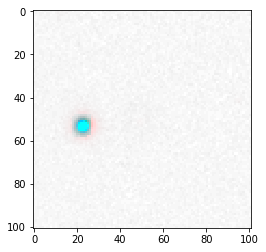

In [73]:
img = PIL.Image.fromarray(data[21][:,:,:])
plt.imshow(img)

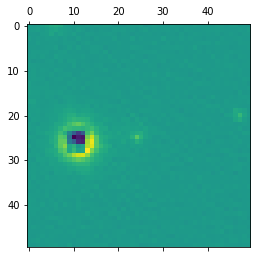

In [70]:
plot_activations(first_layer_activation, 30)

In [71]:
activations = actn_model(img_tensor, model)

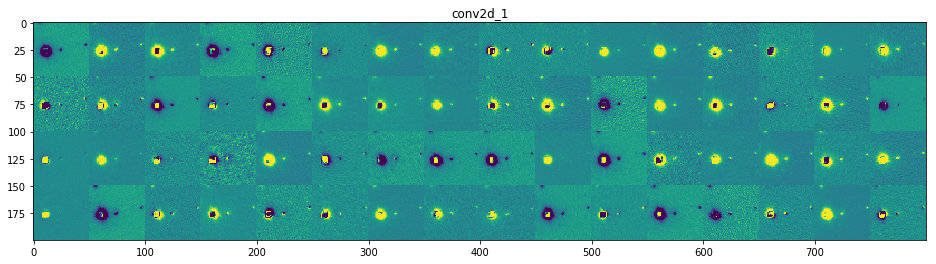

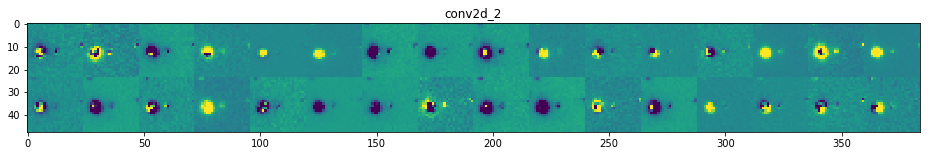

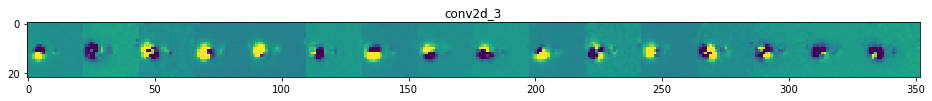

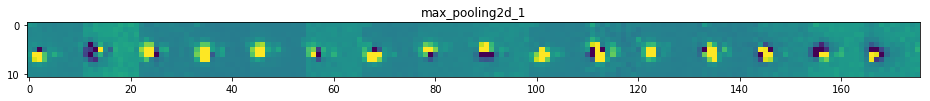

In [72]:
plot_all(activations, model)

## Gradient Class Activation Maps

In [53]:
true_output = model.output[:, 0]

In [54]:
last_conv_layer = model.get_layer('dense_3')

In [56]:
from keras import backend as K

In [57]:
grads = K.gradients(true_output, last_conv_layer.output)[0]

In [58]:
grads

<tf.Tensor 'gradients/strided_slice_grad/StridedSliceGrad:0' shape=(?, 1) dtype=float32>

In [64]:
pooled_grads = K.mean(grads, axis=[0, 1, 2])

ValueError: Invalid reduction dimension 2 for input with 2 dimensions. for 'Mean_4' (op: 'Mean') with input shapes: [?,1], [3] and with computed input tensors: input[1] = <0 1 2>.